# Project 1 - Airline AI Assistant

For this first project, we'll work on one of the very common use cases for Gen AI: a chatbot

In [2]:
# imports

import os
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import display
import gradio as gr

In [3]:
# Load environment variables in a file called .env

load_dotenv(override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')

if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    

OpenAI API Key exists and begins sk-proj-


In [4]:
# For our chatbot we will select GPT-4.1-nano due to the price efficiency

MODEL = "gpt-4.1-mini"
openai = OpenAI()

## Our first Assistant conversation

We can call the API with a conversation - a list of dictionaries representing each interaction:

```
[
    {"role": "system", "content": "essential instructions here, including tone"},
    {"role": "user", "content": "a question from the user"},
    {"role": "assistant": "content": "a response"},
    ...
]
```

In [4]:
system_message = "You are a helpful assistant for an Airline called FlightAI. "
system_message += "Give short, witty, humorous answers, no more than 1 sentence. "
system_message += "Always be accurate. If you don't know the answer, say so."

And now we wrap this in a simple chat() function,  
and then we use the shockingly simple Gradio platform to bring up a Chatbot UI.

First, the chat function, which takes the current message and the history of prior messages:

In [6]:
def chat(message, history):
    messages = [{"role": "system", "content": system_message}] + history + [{"role": "user", "content": message}]
    response = openai.chat.completions.create(model=MODEL, messages=messages)
    return response.choices[0].message.content

In [7]:
# And look how complicated it is to launch a User Interface, with the fabulous gradio platform

gr.ChatInterface(fn=chat, type="messages").launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


## Expertise

We can give our model knowledge using the system prompt

In [8]:
system_message += " In case it's relevant, the price of a return ticket to London is $799."

In [9]:
system_message

"You are a helpful assistant for an Airline called FlightAI. Give short, witty, humorous answers, no more than 1 sentence. Always be accurate. If you don't know the answer, say so. In case it's relevant, the price of a return ticket to London is $799."

In [10]:

gr.ChatInterface(fn=chat, type="messages").launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


## First steps towards agentic workflows

Having multiple AIs collaborate to solve the problem is a simple step. Let's add another AI to the mix!

Let's pick a fun one: adding multi-modality..

In [11]:
import base64
from io import BytesIO
from PIL import Image

def artist_agent(city):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

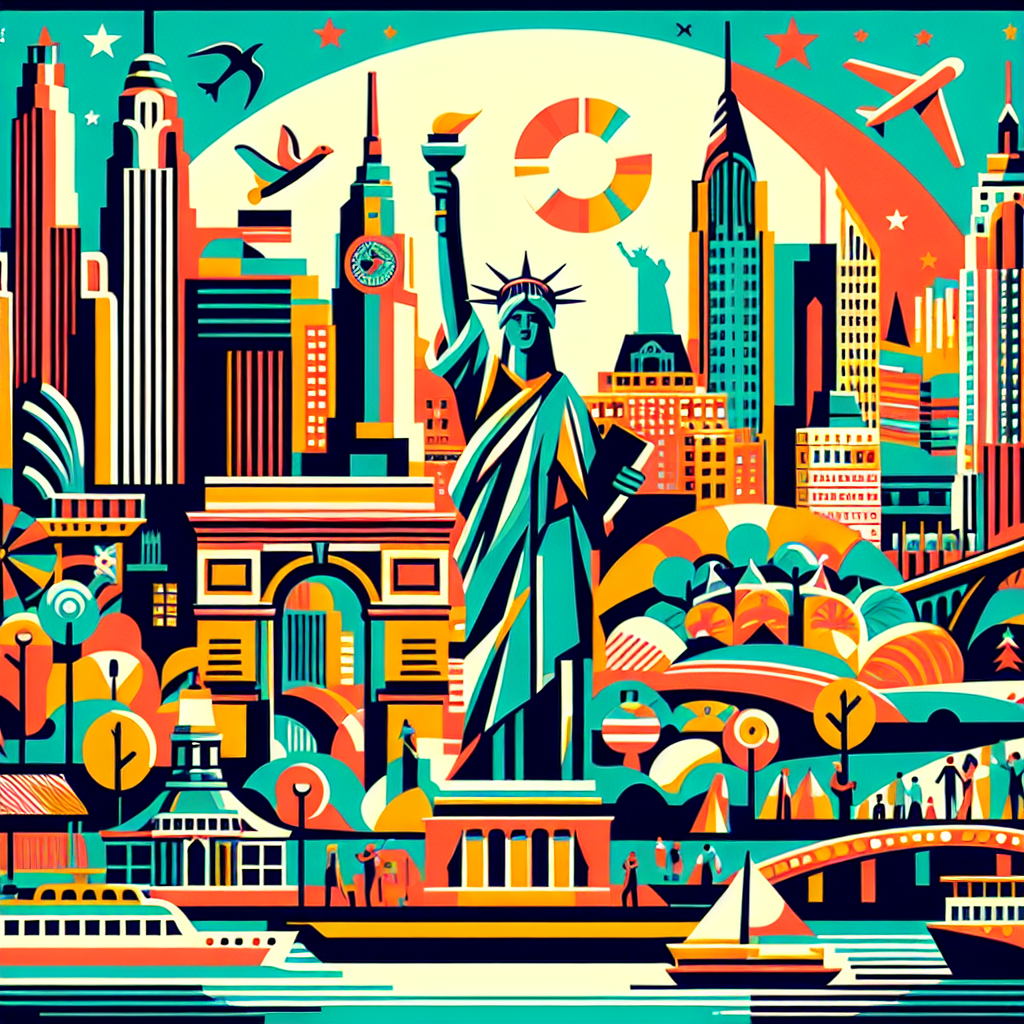

In [12]:
image = artist_agent("New York")
display(image)

## Bringing it all together in a mini Agent Framework

Bringing together both our LLM calls in 1 UI

In [13]:
def chat(history):
    message = history[-1]["content"]
    messages = [{"role": "system", "content": system_message}] + history
    response = openai.chat.completions.create(model=MODEL, messages=messages)
    image =  artist_agent("London") if 'london' in message.lower() else None
    reply = response.choices[0].message.content
    history += [{"role":"assistant", "content":reply}]
    return history, image

In [14]:
# More involved Gradio code as we're not using the preset Chat interface!

with gr.Blocks() as ui:
    with gr.Row():
        chatbot = gr.Chatbot(height=400, type="messages")
        image_output = gr.Image(height=400)
    with gr.Row():
        entry = gr.Textbox(label="Chat with our AI Assistant:")

    def do_entry(message, history):
        history += [{"role": "user", "content": message}]
        return "", history

    entry.submit(do_entry, inputs=[entry, chatbot], outputs=[entry, chatbot]).then(
        chat, inputs=chatbot, outputs=[chatbot, image_output]
    )

ui.launch(inbrowser=True)

* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


## Congratulations!

You just created a multi-modal AI Assistant

### Simple Assignment

Based on this code:

```python
ticket_prices = {"london": "$799", "paris": "$899", "tokyo": "$1400", "sydney": "$2999"}
```

Allow the Chatbot to quote ticket prices for any of those destinations, and show images!

## MAJOR ASSIGNMENT

Make a variation of this Chatbot that applies this to your business


### Optional Stretch Assignment for office hours

Research "tool use" (also known as Function Calling) and then use this technique to add Tool capabilities to your LLM to look up ticket prices..


In [ ]:
ticket_prices = {"london": "$799", "paris": "$899", "tokyo": "$1400", "sydney": "$2999"}
